Import delle librerie e assegnazione dei path dei 3 xlsx

In [1]:
import numpy as np

In [2]:
import statsmodels.api as sm

In [3]:
import pandas as pd

In [4]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
quot = 'quot.xlsx'
comm = 'comm.xlsx'
coop = 'coop.xlsx'

Import dei 3 file excel come pandas dataframe importando solo il foglio di lavoro "Reults".

In [6]:
df_quot = pd.read_excel(quot, sheet_name='Results')
df_comm = pd.read_excel(comm, sheet_name='Results')
df_coop = pd.read_excel(coop, sheet_name='Results')


Esplorazione dei dati partendo dal dataset relativo alle banche quotate:

In [7]:
df = df_coop.copy()
print(f"Il database contiene: {df.shape[0]} banche e {df_quot.shape[1]} colonne")

Il database contiene: 2634 banche e 24 colonne


Le colonne presenti sono:

In [8]:
# Nome colonne
for i, col in enumerate(df.columns):
    print(i+1, "\t", repr(col))

1 	 'Unnamed: 0'
2 	 'Company name Latin alphabet'
3 	 'BvD ID number'
4 	 'Loans\nth EUR 2019'
5 	 'Total assets\nth EUR 2019'
6 	 'Customer deposits\nth EUR 2019'
7 	 'Total equity\nth EUR 2019'
8 	 'Total equity / Total assets (%)\n2019'
9 	 'Total equity / Risk-weighted assets (RWAs) (%)\n2019'
10 	 'NPL ratio (as reported) (%)\n2019'
11 	 'Impaired loans / Average risk weighted assets (RWAs) (%)\n2019'
12 	 'Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019'
13 	 'Impaired loans / Total equity (%)\n2019'
14 	 'Impaired loans / Gross customer loans & advances (%)\n2019'
15 	 'Net income\nth EUR 2019'
16 	 'Return on average equity (ROAE) (%)\n2019'
17 	 'Return on average assets (ROAA) (%)\n2019'
18 	 'Net interest margin (interest earning assets) (%)\n2019'
19 	 'Cost to income (Efficiency) ratio (%)\n2019'
20 	 'Dividends related to the period / Net income (Dividend pay-out ratio) (%)\n2019'
21 	 'Liquid assets\nth EUR 2019'
22 	 'Liqui

In [9]:
# Valori n.a. somma per colonna
temp = df
cols = temp.columns.drop(["Company name Latin alphabet", "BvD ID number"])
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")
total = df.shape[0]
print(temp.isna().sum()/total*100)

Unnamed: 0                                                                                        0.000000
Company name Latin alphabet                                                                       0.000000
BvD ID number                                                                                     0.000000
Loans\nth EUR 2019                                                                               13.477601
Total assets\nth EUR 2019                                                                        13.325740
Customer deposits\nth EUR 2019                                                                   13.553531
Total equity\nth EUR 2019                                                                        13.401670
Total equity / Total assets (%)\n2019                                                            13.401670
Total equity / Risk-weighted assets (RWAs) (%)\n2019                                             41.154138
NPL ratio (as reported) (%)\n2019    


Si procede quindi con l'eliminare le colonne che non verranno utilizzate:

In [10]:
to_be_dropped = ["BvD ID number",
                 "Loans\nth EUR 2019",
                 "Customer deposits\nth EUR 2019",
                 "Total equity\nth EUR 2019",
                 "Total equity / Risk-weighted assets (RWAs) (%)\n2019",
                 "NPL ratio (as reported) (%)\n2019",
                 "Impaired loans / Average risk weighted assets (RWAs) (%)\n2019",
                 "Impaired loans / Total equity (%)\n2019",
                 "Net income\nth EUR 2019",
                 "Dividends related to the period / Net income (Dividend pay-out ratio) (%)\n2019",
                 "Liquid assets\nth EUR 2019",
                 "Liquid assets / Total assets (%)\n2019",
                 "Basel Liquidity Coverage Ratio (LCR) (%)\n2019",
                 "Basel Net Stable Funding Ratio (NSFR) (%)\n2019"]

df.drop(df.columns[df.columns.str.contains('unnamed',case=False)], inplace=True, axis=1)
df.drop(to_be_dropped, inplace= True, axis=1)

E con il rinominare le colonne con nomi di più facile comprensione

In [11]:
df.rename(columns={"Company name Latin alphabet":"Bank name",
                        "Total assets\nth EUR 2019":"Total assets",
                        "Total equity / Total assets (%)\n2019":"Tot Equity/Assets",
                        "Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019":"1y Lagged Impaired Ratio",
                        "Impaired loans / Gross customer loans & advances (%)\n2019":"Imp Loans/Gross Loans",
                        "Return on average equity (ROAE) (%)\n2019":"ROAE",
                        "Return on average assets (ROAA) (%)\n2019":"ROAA",
                        "Net interest margin (interest earning assets) (%)\n2019":"NIM",
                        "Cost to income (Efficiency) ratio (%)\n2019":"CtI Ratio"}, inplace=True)

In [12]:
for i, col in enumerate(df.columns):
    print(i+1, "\t", repr(col))

1 	 'Bank name'
2 	 'Total assets'
3 	 'Tot Equity/Assets'
4 	 '1y Lagged Impaired Ratio'
5 	 'Imp Loans/Gross Loans'
6 	 'ROAE'
7 	 'ROAA'
8 	 'NIM'
9 	 'CtI Ratio'


In [13]:
df.describe()

,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM,CtI Ratio
count,2.283000e+03,2281.000000,1640.000000,1647.000000,2266.000000,2270.000000,2268.000000,2273.000000
mean,7.749647e+06,10.598602,4.392971,4.014706,3.664961,0.383311,1.515549,70.967860
std,6.637640e+07,5.554904,5.573287,5.085314,3.891274,0.380526,5.282201,22.284291
min,1.716200e+04,2.574754,0.000000,0.000000,-32.520127,-5.726369,-200.000000,12.316996
25%,1.796960e+05,8.222460,1.385606,1.280902,1.842207,0.175446,1.394940,63.531955
50%,4.694110e+05,9.801205,2.710552,2.513877,3.349456,0.338166,1.654985,69.964070
75%,1.518966e+06,12.069778,6.451525,5.863266,5.257314,0.550039,1.922715,76.362592
max,1.767643e+09,100.000000,90.311143,89.694574,26.368226,3.503850,12.327309,741.801602


Si procede quindi con l'eliminazione delle banche che presentano campi non completi

In [14]:
cols = df.columns.drop("Bank name")
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")
print(df.isna().sum())
df.dropna(inplace= True)

Bank name                     0
Total assets                351
Tot Equity/Assets           353
1y Lagged Impaired Ratio    994
Imp Loans/Gross Loans       987
ROAE                        368
ROAA                        364
NIM                         366
CtI Ratio                   361
dtype: int64


In [15]:
df.describe()

,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM,CtI Ratio
count,1.631000e+03,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,9.640740e+06,10.392757,4.400130,4.023565,3.190186,0.337962,1.675825,70.377984
std,7.636073e+07,4.356821,5.585627,5.101229,3.874437,0.363513,0.554329,18.573556
min,1.716200e+04,2.574754,0.000000,0.000000,-32.520127,-5.726369,-0.296977,15.955597
25%,2.400984e+05,8.157892,1.379685,1.268668,1.692998,0.158903,1.386695,63.380882
50%,6.738460e+05,9.720710,2.713268,2.526045,2.845161,0.276859,1.654416,69.383394
75%,1.900079e+06,11.926482,6.451785,5.875212,4.624561,0.504043,1.907876,75.698308
max,1.767643e+09,92.914995,90.311143,89.694574,26.368226,2.725348,8.953281,656.501951


In [16]:
print(f"Il database contiene: {df.shape[0]} banche e {df.shape[1]} colonne")

Il database contiene: 1631 banche e 9 colonne


Si procede quindi con l'analisi attraverso regressione lineare multivariata

<AxesSubplot:>

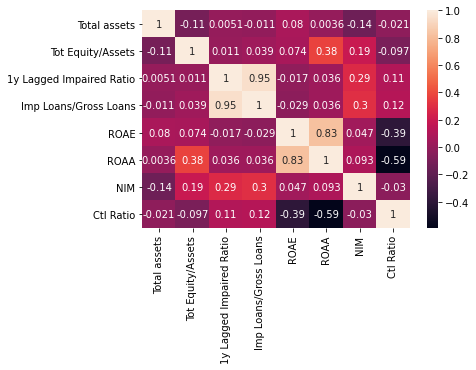

In [17]:
sn.heatmap(df.corr(), annot=True)

In [18]:
# Variabili dipendenti
X = df[['Total assets',
        'Tot Equity/Assets',
        'ROAE',
        'ROAA',
        'NIM',
        'CtI Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = df["1y Lagged Impaired Ratio"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     1y Lagged Impaired Ratio   R-squared:                       0.142
Model:                                  OLS   Adj. R-squared:                  0.139
Method:                       Least Squares   F-statistic:                     44.90
Date:                      Wed, 24 Feb 2021   Prob (F-statistic):           5.15e-51
Time:                              01:40:03   Log-Likelihood:                -4994.3
No. Observations:                      1631   AIC:                         1.000e+04
Df Residuals:                          1624   BIC:                         1.004e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3421      0.812     -6.575      0.000      -6.936      -3.749
Total assets       4.326e-09   1.71e-09      2.523      0.012    9.63e-10    7.69e-09
Tot Equity/Assets    -0.2485      0.038     -6.545      0.000      -0.323      -0.174
ROAE                 -0.5208      0.070     -7.420      0.000      -0.658      -0.383
ROAA                  8.3577      0.925      9.038      0.000       6.544      10.171
NIM                   3.0873      0.238     12.968      0.000       2.620       3.554
CtI Ratio             0.0845      0.009      9.202      0.000       0.066       0.102
==============================================================================
Omnibus:                     2144.822   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539604.337
Skew:                           7.027   Prob(JB):                         0.00
Kurtosis:                      90.993   Cond. No.                     6.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Variabili dipendenti
X = df[['Total assets',
        'Tot Equity/Assets',
        'ROAE',
        'ROAA',
        'NIM',
        'CtI Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = df["Imp Loans/Gross Loans"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Imp Loans/Gross Loans   R-squared:                       0.158
Model:                               OLS   Adj. R-squared:                  0.155
Method:                    Least Squares   F-statistic:                     50.72
Date:                   Wed, 24 Feb 2021   Prob (F-statistic):           2.26e-57
Time:                           01:40:03   Log-Likelihood:                -4831.4
No. Observations:                   1631   AIC:                             9677.
Df Residuals:                       1624   BIC:                             9715.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.6438      0.735     -7.676      0.000      -7.086      -4.202
Total assets       3.282e-09   1.55e-09      2.115      0.035    2.39e-10    6.33e-09
Tot Equity/Assets    -0.2037      0.034     -5.929      0.000      -0.271      -0.136
ROAE                 -0.5071      0.064     -7.984      0.000      -0.632      -0.383
ROAA                  7.9341      0.837      9.481      0.000       6.293       9.576
NIM                   2.9437      0.215     13.663      0.000       2.521       3.366
CtI Ratio             0.0818      0.008      9.843      0.000       0.065       0.098
==============================================================================
Omnibus:                     2287.476   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           867253.233
Skew:                           7.791   Prob(JB):                         0.00
Kurtosis:                     114.887   Cond. No.                     6.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""